## 2022 Fall Shopify Internship Challenge
Steven Bhardwaj  
steven@bhrdwj.net

## TOC
- **Question 1**
    - [Initial_analysis](#Initial_analysis)
        - [Naive_AOV](#Naive_AOV)
        - [Is_this_too_high?](#Is_this_too_high)
        - [EDA_to_explore_data](#EDA_to_explore_data)
    - [Better_way_to_evaluate_data](#Better_way_to_evaluate_data)
        - [What_metric_would_you_report?](#What_metric_would_you_report)
        - [Whats_its_value?](#Whats_its_value)
<br><br>
- **Question 2**
    - [How_many_total_orders_shipped?](#How_many_total_orders_shipped)
    - [Name_of_employee_with_the_most_orders?](#Name_of_employee_with_the_most_orders)
    - [What_product_ordered_most_by_customers_in_Germany?](#What_product_ordered_most_by_customers_in_Germany)

Link to [challenge](https://docs.google.com/document/d/1JxYz-VZHIctOQcw1PIUvCuYouxDWnew5yzBhluVwbso/edit#heading=h.5j27tl9uwcuc)

<hr><hr><hr>

# Question 1

## Q1_Setup

Link to q1
100 sneaker shops, and each of these shops sells only one model of shoe.
- Analyze average order value (AOV)
    - Use orders data over a 30 day window:
        - Naively calculate an AOV of \$3145.13
        - Isn't this too high?
- What could be going wrong with our calculation? 
    - Think about a better way to evaluate this data.
        - What metric would you report for this dataset?
        - What is its value?

In [12]:
import pandas as pd, matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('data_q1.csv')
df.set_index('order_id', inplace=True)

## Initial_analysis

### <mark>Naive_AOV</mark>

In [40]:
df.order_amount.mean()

3145.128

Thinking about typical shoe purchases on the market, it seems unlikely that many of end-consumers are routinely buying thousands of dollars of shoes at the same time.  

### <mark>Is_this_too_high</mark>
It's too high of a number if we are looking for a measure of central tendency where we care about all the shops equally.

### EDA_to_explore_data

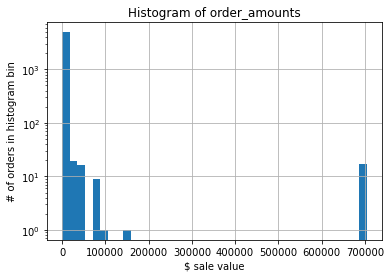

In [41]:
# EDA
fig = plt.figure()
ax = fig.gca()
df.order_amount.hist(ax=ax, bins=40)
ax.set_title('Histogram of order_amounts')
ax.set_yscale('log')
ax.set_ylabel('# of orders in histogram bin')
ax.set_xlabel('$ sale value')
plt.show()

- Interesting that the large purchases are in such a narrow band around $700k.  
- Let's look closer.

In [42]:
df.loc[df.order_amount > 600000].sort_values('created_at')

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


Here we can notice that all of these huge orders were:
- created by a single user, user_id "607"
- bought from the same shop, shop_id "42"
- exact same quantity, 2000 pairs,
- bought at the exact same time, 4am *sharp*, at different days over the month
- many of the orders were simultaneous.

In [33]:
whale_order_sum = df.loc[df.order_amount > 600000].order_amount.sum()
all_orders_sum = df.order_amount.sum()
whale_pct_of_orders= round(whale_order_sum / all_orders_sum, 3) * 100 
whale_pct_of_orders

76.1

## <mark>Better_way_to_evaluate_data</mark>

- If these orders are real, the whale's orders are 76.1% of total order_amount sum.
- Let's presume these orders are real.
    - But regardless, there's some level of parity in our prioritization of the shops
        - so we don't just care about total revenue.
- How to look at central tendency of shop order-values without being overwhelmed by the outlier whale?
    - If we still want to look at average order value (AOV),
        - then we should separate out the whale orders.
    - But maybe we should instead look into quantiles, or the median.

#### <mark>What_metric_would_you_report</mark>
- Maybe instead report **median order value** as a metric. 

In [45]:
df.order_amount.median()

284.0

#### <mark>Whats_its_value</mark>
- The median order value is \$284.
- But, it's good to be aware of the whale!!

<hr><hr><hr>

# Question 2

Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### <mark>How_many_total_orders_shipped</mark>

```SQL
select count(*) from orders;
```

196 total orders

### <mark>Name_of_employee_with_the_most_orders</mark>


```SQL
select 
	Employees.FirstName
    ,Employees.LastName
    ,count(Orders.OrderID) as order_count
from 
	Orders 
    join Employees
    	on orders.EmployeeID = Employees.EmployeeID
group by
	Employees.EmployeeID
order by
	order_count desc
limit 1
;
```

|FirstName | LastName | order_count|
|:-----    |:-------  |:---------  |
| Margaret | Peacock  | 40         |

### <mark>What_product_ordered_most_by_customers_in_Germany</mark>

```SQL
select 
    OrderDetails.ProductID
    ,Products.ProductName
    ,sum(OrderDetails.Quantity) as total_qty_orders
from
    OrderDetails
    join Products
        on OrderDetails.ProductID = OrderDetails.ProductID
    join Orders
        on Orders.OrderID = OrderDetails.OrderID
    join Customers
        on Orders.CustomerID = Customers.CustomerID
where
    Customers.Country = 'Germany'
group by
    OrderDetails.ProductID
order by
    total_qty_orders desc
limit
	1
;
```

| ProductID | ProductName | total_qty_orders |
|  ---      | ---         |                  |
| 40	    | Chais	      | 12320            |

#### Schema (for reference)

| OrderDetails  | Products    | Orders     | Customers    |
| :---          | :---        | :---       | :---         |
| OrderDetailID	| ProductID   | OrderID    | CustomerID   |
| OrderID       | ProductName | CustomerID | CustomerName |
| ProductID     | SupplierID  | EmployeeID | ContactName  |
| Quantity      | CategoryID  | OrderDate  | Address      |
|               | Unit        | ShipperID  | City         |
|               | Price       |            | PostalCode   |
|               |             |            | Country      |
